# 球状星团的三维空间分布

## 题目

已知 157 个银河系的球状星团的距离 r，假设它们成球对称分布，密度轮廓是幂律的，求幂律的幂指数。

## 分析

假设球状星团数目 $N=Ar^{-n}$，n 即幂指数。

设 n 服从正态分布：$n\sim N(\mu,\tau^2)$。$\mu$ 和 $\tau$ 即总体的超参数。

如果观测到某一距离 $r_j$ 处的球壳中有 $y_j$ 个球状星团，则有：$P(y_j|n_j)\sim r_j^{-n}$

联合后验分布：$P(\mu,\tau,n|y)\propto P(y|n)P(n|\mu,\tau)P(\mu,\tau)$，其中 $n=(n_1,...,n_J)$

右边三项中，第一项（likelihood）服从泊松分布，第二项服从正态分布，第三项可以自己选定（无信息即可）。

#### 另一种方法，考虑球壳中的数目为泊松分布，得到另一种层次化模型。

In [8]:
%matplotlib inline
#posteior distribution of binomial data
import numpy as np
import numpy.linalg as nl
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib
import astropy.io.fits as fits
from astropy.table import Table
import scipy.special as special
from scipy.optimize import curve_fit
import time

matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 

## Derive density profile of the MW GCs

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


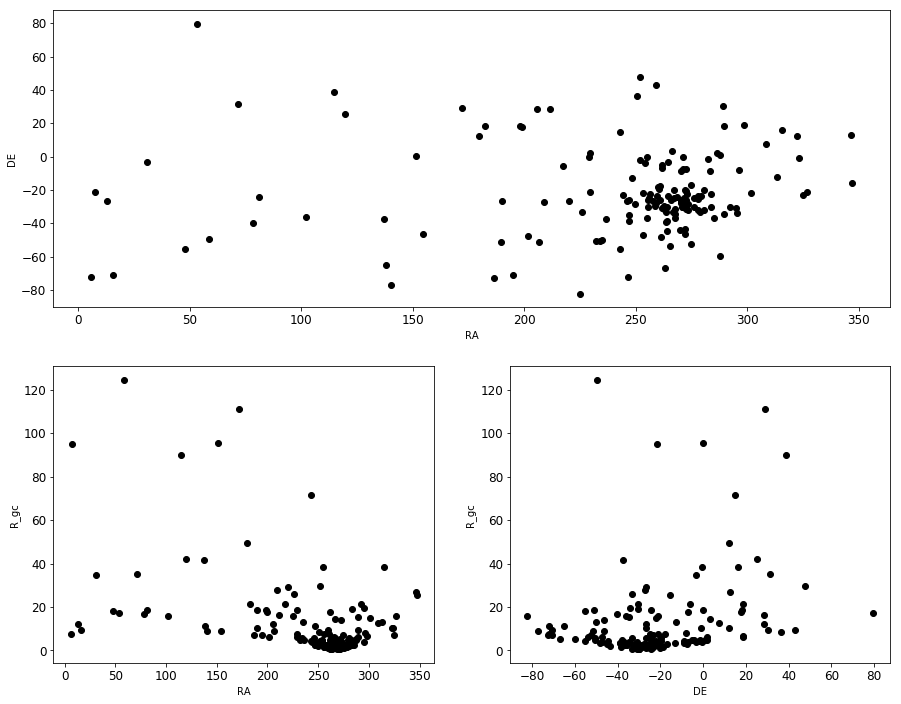

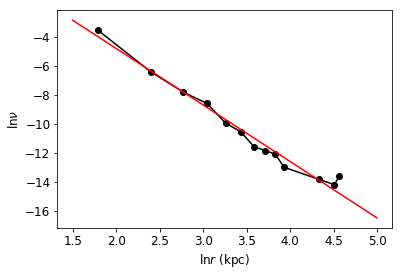

In [9]:
'''
Derive density profile of the MW GCs
'''
hdulist = fits.open('GC_Eadie2016.fits')
gc = hdulist[1].data
r = gc.Rgc   # 银心距
sig_r = 0.1*r   # 假设距离误差为10%，不过之后没有用到

fig = plt.figure(figsize=[15,12])
ax1 = fig.add_subplot(2,2,(1,2))
ax1.plot(gc._RA,gc._DE,'ko')
ax1.set_xlabel('RA')   #赤经
ax1.set_ylabel('DE')   #赤纬

ax2 = fig.add_subplot(2,2,3)
ax2.plot(gc._RA,gc.Rgc,'ko')
ax2.set_xlabel('RA')
ax2.set_ylabel('R_gc')

ax3 = fig.add_subplot(2,2,4)
ax3.plot(gc._DE,gc.Rgc,'ko')
ax3.set_xlabel('DE')
ax3.set_ylabel('R_gc')

fig.show()


rgrid = np.arange(1.,110.,5.)
N = np.zeros(np.shape(rgrid))
for i in range(1,len(rgrid)):
    N[i] = np.sum((r<=rgrid[i]) & (r>rgrid[i-1]))

    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.log(rgrid[N>0]),np.log(N[N>0]/(4*np.pi*(rgrid[N>0]**3-(rgrid[N>0]-5)**3))),'ko-')
ax.plot([1.5,5.0],np.array([1.5,5.0])*(-3.9)+3.,'r')
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlabel(r'$\ln r$ (kpc)',fontsize=12)
ax.set_ylabel(r'$\ln \nu$',fontsize=12)   # 数目/体积 得到数密度
fig.show()


## 计算

假设数密度的幂律分布：$\nu=Ar^{-n}$

将球体积划分成若干球壳，在每个球壳内，球状星团的期望数目为：

$y_i = P(r_i<r<r_i+\Delta r_i)\sim Poisson(\lambda|n)$

其中 $\lambda = \nu \Delta V= \frac{4\pi A(r^{3-n}-(r+\Delta r)^{3-n})}{3-n}$

在贝叶斯的框架下，后验分布为：

$p(\lambda,A, n|y)\propto p(A, n)\prod_{i=1}^{k} p(\lambda_i|A, n)\prod_{i=1}^{k}p(y_i|\lambda_i)$

后三项分别为先验，条件先验和 likelihood。

利用平均值 $\bar{\lambda}_i(n)=\frac{4\pi A (r^{3-n}-(r+\Delta r)^{3-n})}{3-n}$，得到：

$p(A, n|y)\propto p(A, n)\prod_{i=1}^{k} p(y_i|\bar{\lambda}_i)$

即边缘化后验概率分布

-57.00415983500146 3.889999999999981


/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


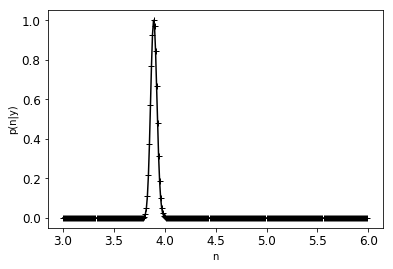

In [12]:
'''
此处代码及结果和视频中不太一样
以视频为主要参考
'''

A = len(r) #number of GCs
n = np.arange(3,6,0.01)

lnp = np.zeros(np.shape(n))
for i in range(len(n)):
    lnp0 = 0
    for j in range(1,len(rgrid)):
        if N[j]>0:
            theta = A*rgrid[j]**(3-n[i]) # mean value of p(theta|n)
            lnp00 = stats.poisson.logpmf(N[j],theta)
            if np.isinf(lnp00)==False:
                lnp0 += lnp00
    lnp[i] = lnp0
print(np.max(lnp),n[np.argmax(lnp)])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(n,np.exp(lnp-np.max(lnp)),'k+-')
ax.set_xlabel('n')
ax.set_ylabel('p(n|y)')
fig.show()

## Halo density profile derived from halo stars

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


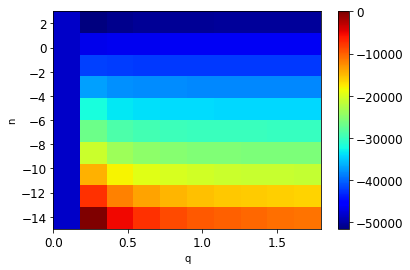

In [7]:
'''
Star count: derive stellar halo density profile from parallax
'''

def p_rho_qn(rho,q,n, R0, B):
    '''
    assume the profile in a power law
    rho: distance in kpc
    q: axis ratio
    n: power index
    R0: distance from Sun to GC in kpc
    B: Galactic latitude in radian
    '''
    r = (R0+rho*np.cos(B))**2+(rho*np.sin(B)/q)**2
    return r**(-0.5*n)#*1000.

def lnlikeli_par_rho(par,par_sig,rho):
    '''
    likelihood p(par|rho)
    par, par_sig: parallax and its uncertainty, in mas
    rho: distance in kpc
    '''
    return -(par-(1./rho))**2/(2.*par_sig**2)

stars = Table.read('LMGaia_halo_stars.fits').to_pandas()

q_grid = np.arange(0.,2.,0.2)
n_grid = np.arange(-15,5,2.)
rho_grid = np.arange(0,100,0.01)

R0 = 8
N = 1000
B = stars.glat[:N]
par = stars.parallax[:N]+0.057
par_sig = stars.parallax_error[:N]

q_mesh,n_mesh = np.meshgrid(q_grid,n_grid)
post = np.zeros_like(q_mesh)

for i in range(len(q_grid)):
    for j in range(len(n_grid)):
        lnp = np.zeros((N,))
        #print(q_grid[i],n_grid[j])
        for k in range(N):
            lnp[k] = np.log(np.sum(p_rho_qn(rho_grid,q_grid[i],n_grid[j], R0, B[k]) *\
                   np.exp(lnlikeli_par_rho(par[k],par_sig[k],rho_grid))))
        thres = np.percentile(lnp[np.isinf(lnp)==False],2.5)
        post[j,i] = np.sum(lnp[(np.isinf(lnp)==False) & (lnp>thres)])

#draw p(q,n|par)
fig = plt.figure()
plt.set_cmap('jet')
ax = fig.add_subplot(111)
e = ax.imshow((post-np.max(post)),\
              extent=[q_grid[0],q_grid[-1],n_grid[-1],n_grid[0]],aspect='auto')

plt.colorbar(e)
ax.set_ylim([n_grid[0],n_grid[-1]])
ax.set_xlim([q_grid[0],q_grid[-1]])
ax.set_xlabel('q')
ax.set_ylabel('n')

fig.show()

## RRLy MG-FeH relation

In [58]:
'''
RRLy MG
'''
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.interpolate import interp1d
import matplotlib
from matplotlib import cm
from matplotlib.colors import Normalize
matplotlib.rc('xtick',labelsize=12)
matplotlib.rc('ytick',labelsize=12)
from astropy.table import Table
import pandas as pd
from scipy.optimize import curve_fit

def straightline(x,a,b):
    return x*a+b

def getEBVfromSFD98(Emapfile,l,b):
    hdulist = fits.open(Emapfile[0])
    Emap_N = hdulist[0].data.copy()
    hdulist.close()
    
    hdulist = fits.open(Emapfile[1])
    Emap_S = hdulist[0].data.copy()
    hdulist.close()
    
    #Emap = [Emap_N,Emap_S]
    
    n = np.sign(b)*1
    EBVN = np.zeros_like(b)
    EBVS = np.zeros_like(b)
    EBV = np.zeros_like(b)
    x = np.array([np.int(2048.*np.sqrt(1.-n[i]*np.sin(b[i]*np.pi/180.))*\
                         np.cos(l[i]*np.pi/180.)+2047.5) for i in range(len(l))])
    y = np.array([np.int(-2048.*n[i]*np.sqrt(1.-n[i]*np.sin(b[i]*np.pi/180.))*\
                         np.sin(l[i]*np.pi/180.)+2047.5) for i in range(len(l))])
                  
    EBVN = np.array([Emap_N[x[i],y[i]] for i in range(len(l))])
    EBVS = np.array([Emap_S[x[i],y[i]] for i in range(len(l))])

    EBV = EBVN
    EBV[n<0] = EBVS[n<0]

    return EBV 

def lnprob_absMag(M,A,m,parallax,parallax_err):
    parallax0 = 1000.*10.**((M+A-m-5)/5.)
    return -(parallax-parallax0)**2./(2*parallax_err**2)
def draw_absMag(A,m,parallax,parallax_err):
    N = 10000
    M_1 = np.random.uniform(low = -10., high = 15., size=N)
    y_1 = np.random.uniform(low = 0, high = 1.1, size=N)
    y_0 = np.exp(lnprob_absMag(M_1,A,m,parallax,parallax_err))
    ind = y_1<y_0
    return M_1[ind]
def est_absMag(A,m,parallax,parallax_err):
    M_d = draw_absMag(A,m,parallax,parallax_err)
    return np.mean(M_d),np.std(M_d),M_d

#RR = Table.read("/share/data/cliu/data/RRLy/RRab_1940_fullgaia.fits").to_pandas()
RRLM = Table.read("con_all_Table_RRabxLMdr6xGaia_1592_sn15teff_gt_0.fits").to_pandas()
print(len(RRLM))


EBV = getEBVfromSFD98(['/Users/cliu/Data/schlegel/SFD_dust_4096_ngp.fits',\
                       '/Users/cliu/Data/schlegel/SFD_dust_4096_sgp.fits'],RRLM.l,RRLM.b)


Delta_parallax = -0.057

parallax = RRLM.parallax-Delta_parallax
ind_moresel = (RRLM.gaia & RRLM.cata) |(RRLM.cata & RRLM.gcvs) | \
    (RRLM.gaia & RRLM.gcvs) | RRLM.dambis| RRLM.skarka
gcond = np.exp(-0.2*(RRLM.phot_g_mean_mag-19.5))
gcond[gcond<1.] = 1.
ind_goodastr = (parallax>0) & (parallax/RRLM.parallax_error>5) &\
            (np.sqrt(RRLM.astrometric_chi2_al/(RRLM.astrometric_n_good_obs_al-5))<1.2*gcond) &\
            (RRLM.phot_g_mean_flux_over_error>20) & (EBV<1.)
ind_goodphot = (RRLM.phot_g_mean_flux_over_error>20) 
ind_goodspec = (RRLM.snrg>15) & (RRLM.teff>0)
ind_good = ind_goodastr & ind_goodphot & ind_goodspec & ind_moresel

A0 = EBV*3.1
print('Number of good objects:',np.sum(ind_good))
start = time.time()
MGlikeli = np.zeros((len(RRLM.source_id),2))
for i in range(len(RRLM.source_id)):
    M_dr = draw_absMag(0., RRLM.phot_bp_mean_mag[i],parallax[i],\
                     RRLM.parallax_error[i])
    MGlikeli[i,:] = np.array([np.median(M_dr),np.std(M_dr)])
    if np.mod(i,100)==0:
        print(i)
MGlikeli[:,0] = MGlikeli[:,0] - 0.871*A0
print(time.time()-start)

1592
Number of good objects: 425
0
100


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in less
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
2.1891069412231445


Number of sample: 425


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


escape time: 20.41404676437378
-1223.2092675013337


/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


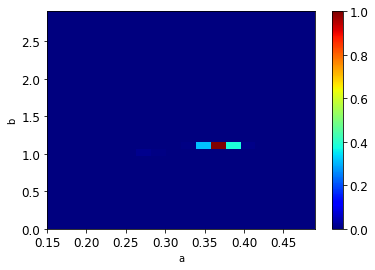

In [61]:
def log_M_abZ(Mgrid,a,b,Z,Zerr):
    return -(Mgrid-(a*Z+b))**2/(2*(Zerr)**2)
def log_m_M_par(Mgrid,A,m,parallax,parallax_err):
    parallax0 = 1000.*10.**((Mgrid+A-m-5)/5.)
    return -(parallax-parallax0)**2./(2*parallax_err**2)
def post_ab_parZ(a,b,m,A,parallax,parallax_error, Z,Zerr,Mgrid,more=False,individual=False):
    lnp = np.zeros((len(parallax),))
    lnp_i = np.zeros((len(parallax),len(Mgrid)))
    for i in range(len(parallax)):
        lnp1 = log_M_abZ(Mgrid,a,b,Z[i],Zerr[i])
        lnp2 = log_m_M_par(Mgrid,A[i],m[i],parallax[i],parallax_error[i])
        lnp_i[i,:] = np.exp(lnp1)*np.exp(lnp2)
        lnp[i] = np.log(np.sum(lnp_i[i])*(Mgrid[1]-Mgrid[0]))
    thres = np.percentile(lnp[(np.isinf(lnp)==False)],2.5)
    #print(np.mean(lnp[(np.isinf(lnp)==False)]),np.std(lnp[(np.isinf(lnp)==False)]),thres)
    lnp1 = lnp[(np.isinf(lnp)==False) & (lnp>thres)]
    if individual:
        return lnp_i
    else:
        if more:
            return lnp1
        else:
            return np.sum(lnp1)    


Mgrid = np.arange(-10,10,0.02)

A = 0.871*A0[ind_good]
m = RRLM.phot_g_mean_mag[ind_good].get_values()
par = parallax[ind_good].get_values()
parerr = RRLM.parallax_error[ind_good].get_values()
Z = RRLM.feh[ind_good].get_values()
Zerr = 0.1*np.ones_like(Z)
sourceID = RRLM.source_id[ind_good].get_values()
FeH = RRLM.feh[ind_good].get_values()
Teff = RRLM.teff[ind_good].get_values()

print('Number of sample:',len(Z))

# Use a a-b grid

a_grid = np.arange(0.15,0.5,0.02)
b_grid = np.arange(0,3,0.1)
a_mesh,b_mesh = np.meshgrid(a_grid,b_grid)

start = time.time()
prob = np.zeros_like(a_mesh)
for i in range(len(a_grid)):
    #print(i)
    for j in range(len(b_grid)):
        prob[j,i] = post_ab_parZ(a_grid[i],b_grid[j],m,A,par,parerr, Z,Zerr,Mgrid)
print('escape time:',time.time()-start)
print(np.max(prob))

fig = plt.figure()
plt.set_cmap('jet')
ax = fig.add_subplot(111)
e = ax.imshow(np.exp(prob-np.max(prob)),extent=[a_grid[0],a_grid[-1],b_grid[-1],b_grid[0]],aspect='auto')

plt.colorbar(e)
ax.set_ylim([b_grid[0],b_grid[-1]])
ax.set_xlim([a_grid[0],a_grid[-1]])
ax.set_xlabel('a')
ax.set_ylabel('b')

fig.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


escape time: 250.66860008239746


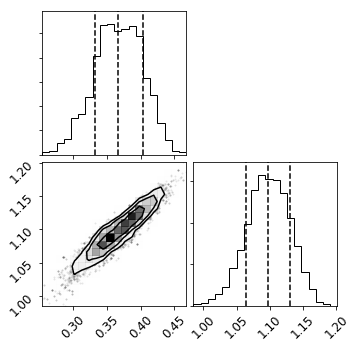

In [62]:
# use MCMC

#MCMC
import emcee
import corner
def lnprob(x,m,A,par,parerr, Z,Zerr,Mgrid):
    a = x[0]
    b = x[1]
    if a<0 or a>1 or b<0 or b>3:
        return -1e50
    else:
        return (post_ab_parZ(a,b,m,A,par,parerr, Z,Zerr,Mgrid))+1223.

def mcmc_ab(m,A,par,parerr, Z,Zerr,Mgrid):
    nwalkers = 10
    ndim = 2
    p0=np.zeros((nwalkers,ndim))
    p0[:,0] = np.random.rand(nwalkers)*1.0
    p0[:,1] = np.random.rand(nwalkers)*2.0
    
    sampler = emcee.EnsembleSampler(nwalkers, \
            ndim, lnprob, args=[m,A,par,parerr, Z,Zerr,Mgrid])
    pos, prob, state = sampler.run_mcmc(p0, 200)
    sampler.reset()
    sampler.run_mcmc(pos, 500)
    samples = sampler.chain[:, :, :].reshape((-1, ndim))
    figu = corner.corner(samples,quantiles=[0.16, 0.5, 0.84])
    return samples  

start = time.time()
samples = mcmc_ab(m,A,par,parerr, Z,Zerr,Mgrid)
print('escape time:',time.time()-start)

In [63]:
ind_s = (samples[:,1]>0.0)
a_est = np.mean(samples[ind_s,0])
b_est = np.mean(samples[ind_s,1])
a_std = np.std(samples[ind_s,0])
b_std = np.std(samples[ind_s,1])
print('MCMC result:\n a=%(a).3f+/=%(ae).3f, b=%(b).3f+/=%(be).3f' % \
      {'a':a_est,'b':b_est,\
       'ae':a_std,'be':b_std})

MCMC result:
 a=0.367+/=0.035, b=1.097+/=0.033


In [ ]:
## Binary star properties